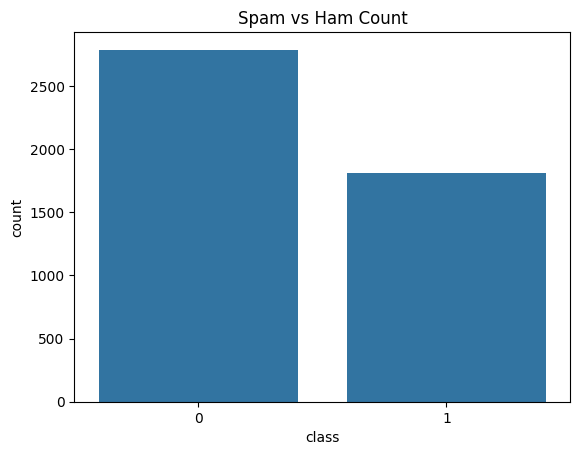

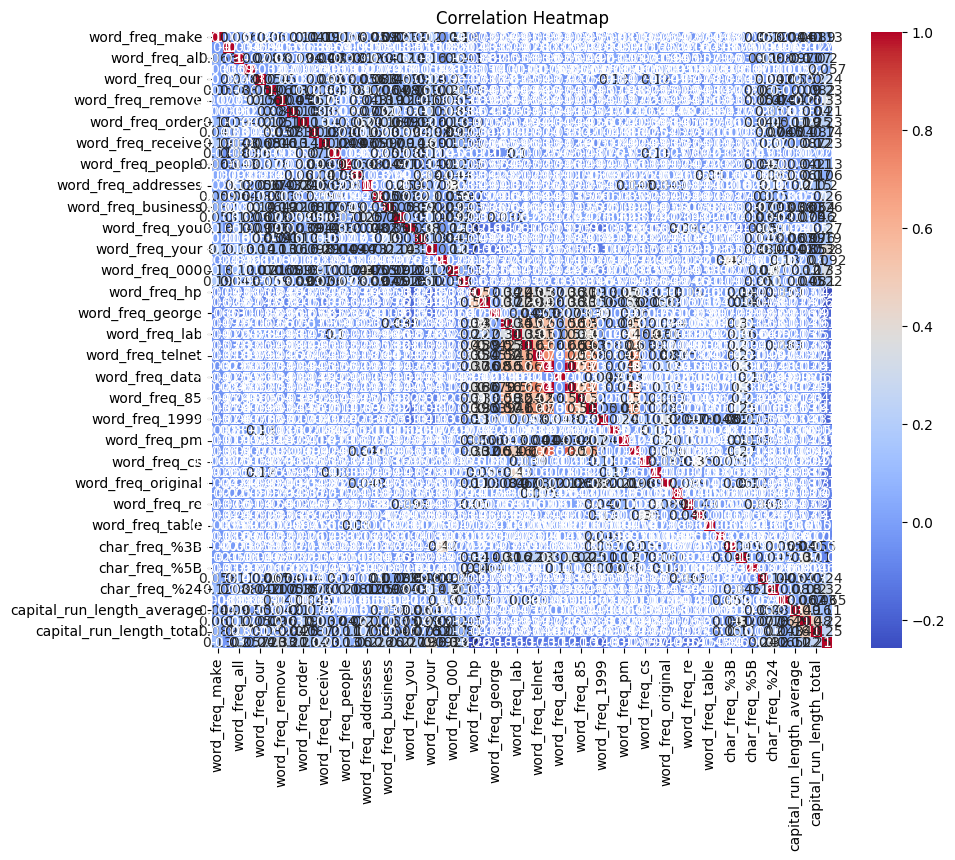

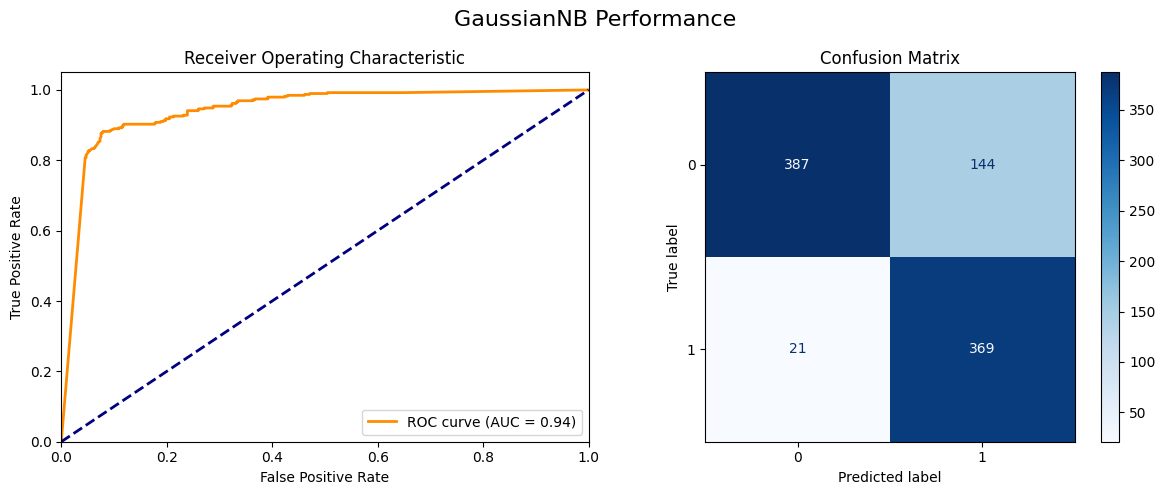


GaussianNB
Accuracy: 0.8208469055374593
Precision: 0.7192982456140351
Recall: 0.9461538461538461
F1 Score: 0.8172757475083057


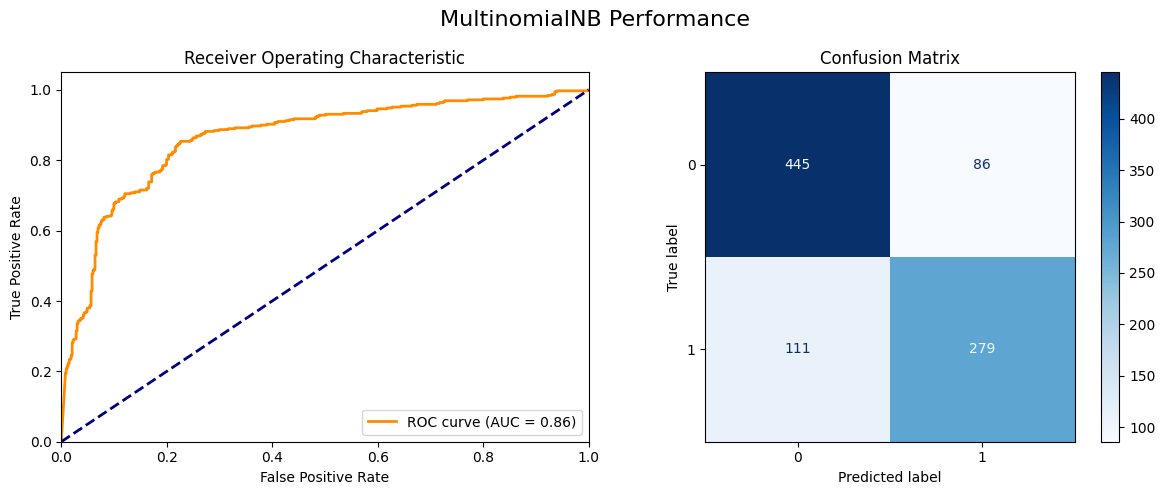


MultinomialNB
Accuracy: 0.7861020629750272
Precision: 0.7643835616438356
Recall: 0.7153846153846154
F1 Score: 0.7390728476821192


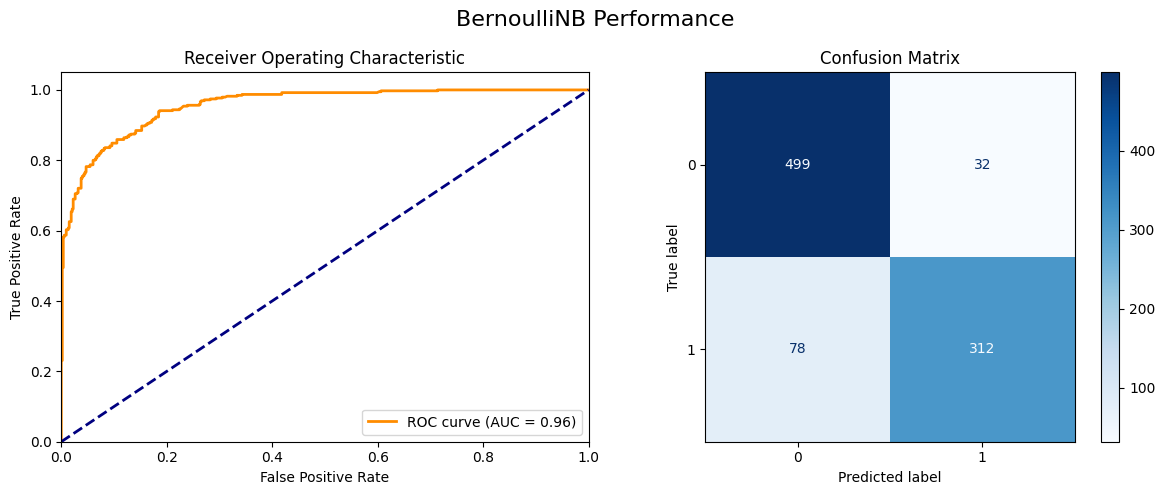


BernoulliNB
Accuracy: 0.8805646036916395
Precision: 0.9069767441860465
Recall: 0.8
F1 Score: 0.8501362397820164


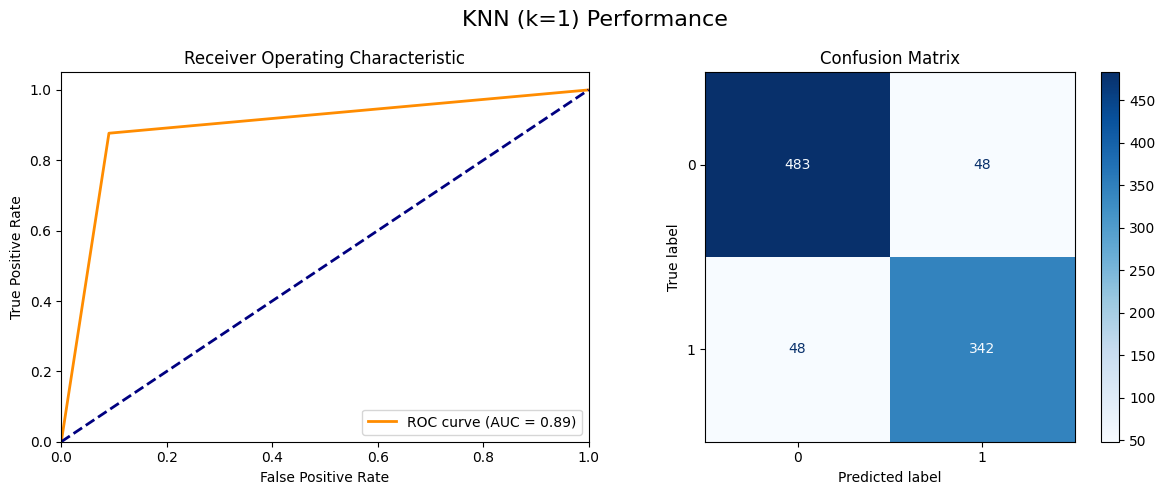


KNN (k=1)
Accuracy: 0.8957654723127035
Precision: 0.8769230769230769
Recall: 0.8769230769230769
F1 Score: 0.8769230769230769


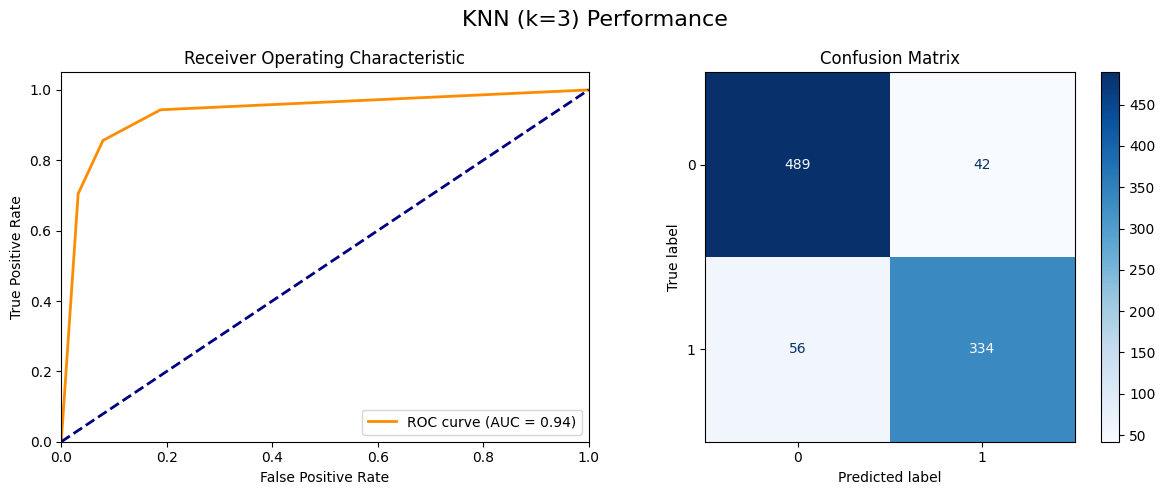


KNN (k=3)
Accuracy: 0.8935939196525515
Precision: 0.8882978723404256
Recall: 0.8564102564102564
F1 Score: 0.8720626631853786


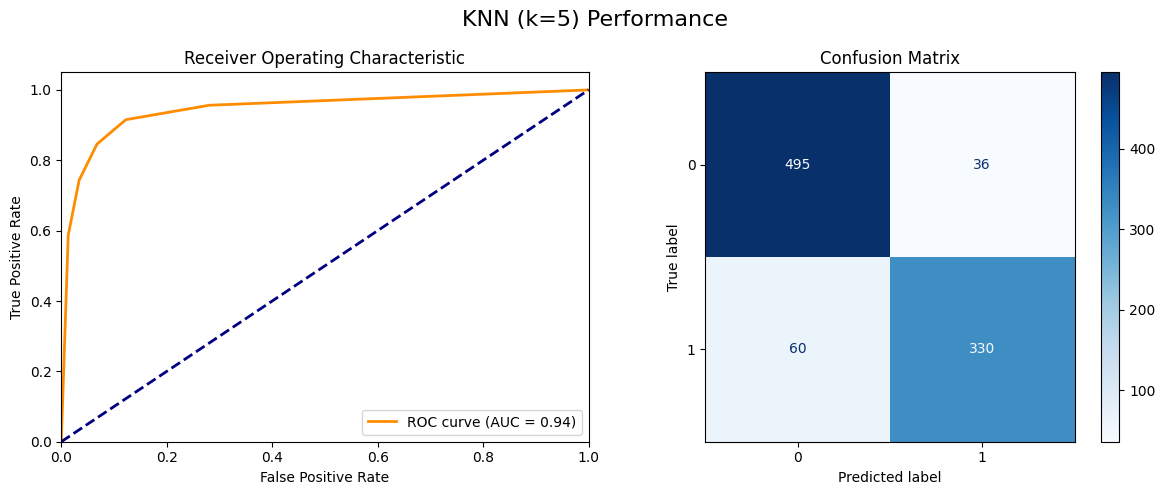


KNN (k=5)
Accuracy: 0.8957654723127035
Precision: 0.9016393442622951
Recall: 0.8461538461538461
F1 Score: 0.873015873015873


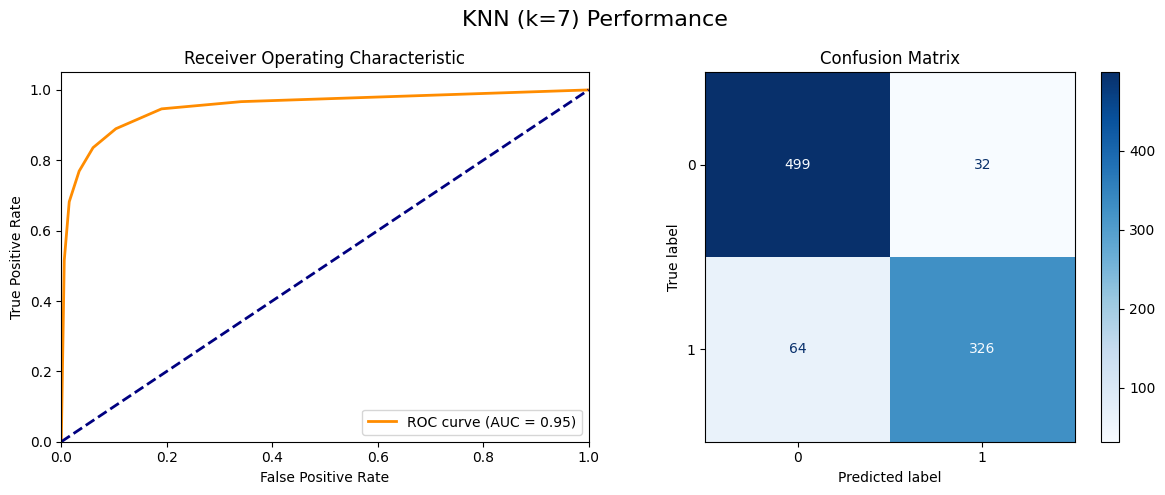


KNN (k=7)
Accuracy: 0.8957654723127035
Precision: 0.9106145251396648
Recall: 0.8358974358974359
F1 Score: 0.8716577540106952


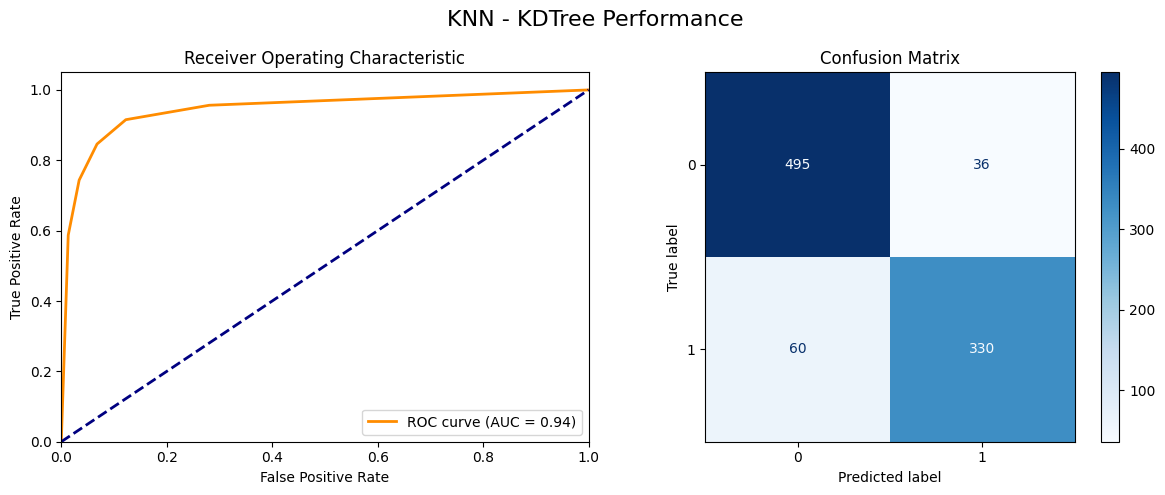


KNN - KDTree
Accuracy: 0.8957654723127035
Precision: 0.9016393442622951
Recall: 0.8461538461538461
F1 Score: 0.873015873015873


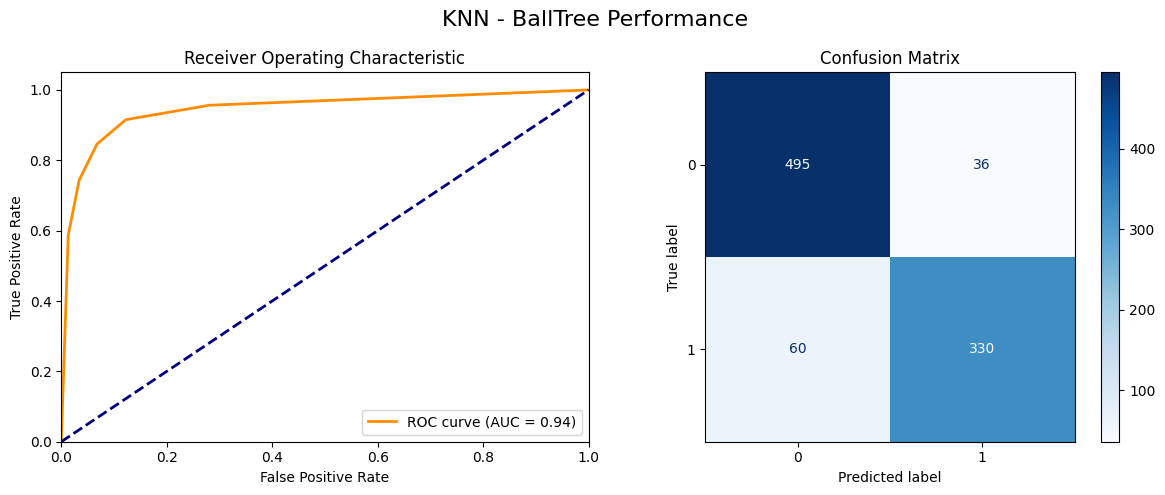


KNN - BallTree
Accuracy: 0.8957654723127035
Precision: 0.9016393442622951
Recall: 0.8461538461538461
F1 Score: 0.873015873015873


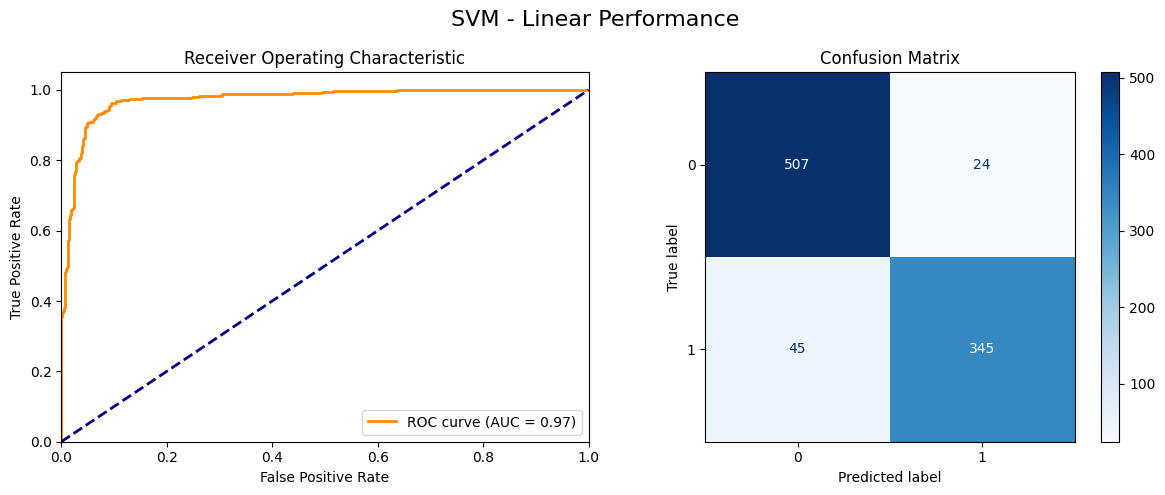


SVM - Linear
Accuracy: 0.9250814332247557
Precision: 0.9349593495934959
Recall: 0.8846153846153846
F1 Score: 0.9090909090909091


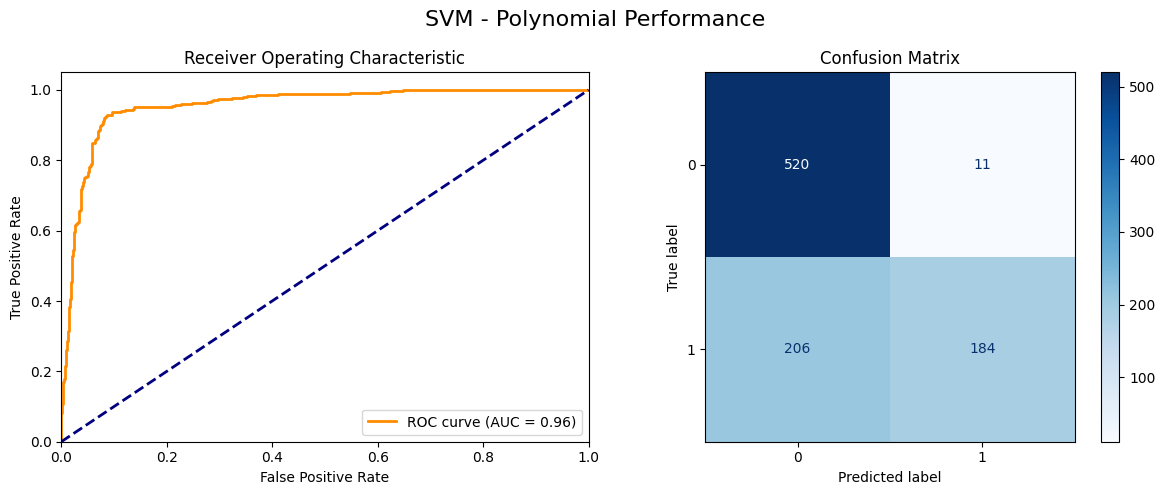


SVM - Polynomial
Accuracy: 0.7643865363735071
Precision: 0.9435897435897436
Recall: 0.4717948717948718
F1 Score: 0.629059829059829


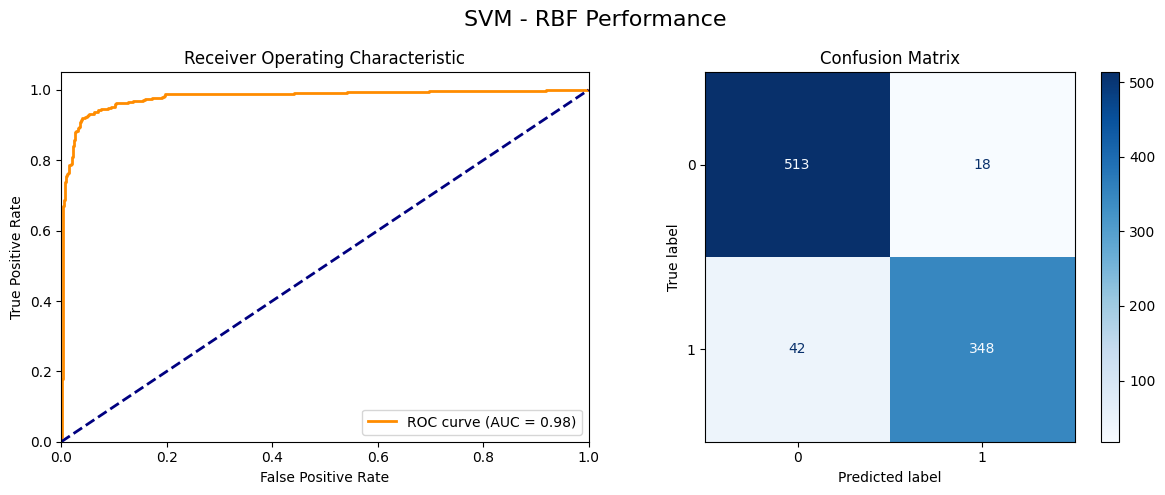


SVM - RBF
Accuracy: 0.9348534201954397
Precision: 0.9508196721311475
Recall: 0.8923076923076924
F1 Score: 0.9206349206349206


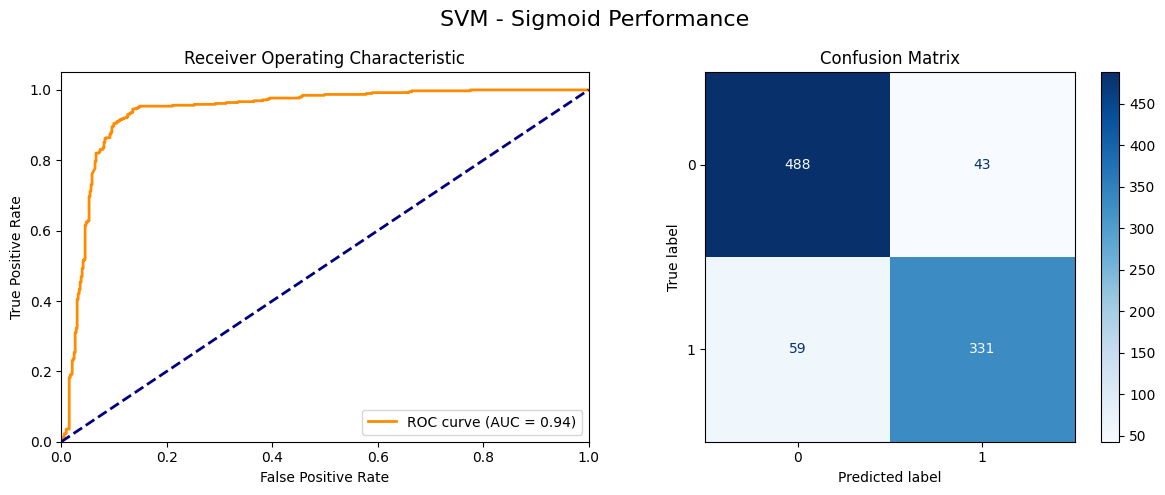


SVM - Sigmoid
Accuracy: 0.8892508143322475
Precision: 0.8850267379679144
Recall: 0.8487179487179487
F1 Score: 0.8664921465968587

--- 5-Fold Cross-Validation ---
Naive Bayes Fold Accuracies: [0.82084691 0.8173913  0.80108696 0.82065217 0.83586957]
Naive Bayes Average Accuracy: 0.8192
KNN (k=5) Fold Accuracies: [0.89576547 0.90434783 0.92934783 0.90326087 0.90978261]
KNN (k=5) Average Accuracy: 0.9085
SVM (RBF) Fold Accuracies: [0.93485342 0.93369565 0.92282609 0.93586957 0.93043478]
SVM (RBF) Average Accuracy: 0.9315

Table 1: Naive Bayes Performance
             Accuracy  Precision    Recall  F1 Score
Gaussian     0.820847   0.719298  0.946154  0.817276
Multinomial  0.786102   0.764384  0.715385  0.739073
Bernoulli    0.880565   0.906977  0.800000  0.850136

Table 2: KNN Performance for Different k
   k  Accuracy  Precision    Recall  F1 Score
0  1  0.895765   0.876923  0.876923  0.876923
1  3  0.893594   0.888298  0.856410  0.872063
2  5  0.895765   0.901639  0.846154  0.873016
3  7

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
)

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load dataset
df = pd.read_csv("spambase_csv.csv")
df.fillna(df.mean(), inplace=True)

# Feature and label split
X_raw = df.drop(columns=['class'])
y = df['class']

# Train/test split for raw data (Naive Bayes)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y, test_size=0.2, random_state=42)

# Scale data for KNN and SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# EDA: Class balance
sns.countplot(x=y)
plt.title("Spam vs Ham Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Evaluation function
def evaluate(name, model, X_test, y_test):
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'{name} Performance', fontsize=16)

    # ROC Curve
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)

        ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax1.set_xlim([0.0, 1.0])
        ax1.set_ylim([0.0, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.set_title('Receiver Operating Characteristic')
        ax1.legend(loc="lower right")

    # Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax2, cmap=plt.cm.Blues)
    ax2.set_title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)

    return acc, prec, rec, f1

# ========== NAIVE BAYES ==========
nb_table = []

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_raw, y_train_raw)
nb_table.append(evaluate("GaussianNB", gnb, X_test_raw, y_test_raw))

# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_raw, y_train_raw)
nb_table.append(evaluate("MultinomialNB", mnb, X_test_raw, y_test_raw))

# BernoulliNB (binarized)
bnb = BernoulliNB()
X_train_bin = Binarizer().fit_transform(X_train_raw)
X_test_bin = Binarizer().fit_transform(X_test_raw)
bnb.fit(X_train_bin, y_train_raw)
nb_table.append(evaluate("BernoulliNB", bnb, X_test_bin, y_test_raw))

# ========== KNN WITH VARYING K ==========
knn_table = []
for k in [1, 3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_scaled)
    result = evaluate(f"KNN (k={k})", knn, X_test_scaled, y_test_scaled)
    knn_table.append((k,) + result)

# ========== KNN KDTree vs BallTree ==========
knn_kd = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
start_kd = time.time()
knn_kd.fit(X_train_scaled, y_train_scaled)
kd_result = evaluate("KNN - KDTree", knn_kd, X_test_scaled, y_test_scaled)
kd_time = time.time() - start_kd

knn_bt = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
start_bt = time.time()
knn_bt.fit(X_train_scaled, y_train_scaled)
bt_result = evaluate("KNN - BallTree", knn_bt, X_test_scaled, y_test_scaled)
bt_time = time.time() - start_bt

# ========== SVM KERNELS ==========
svm_table = []
svm_kernels = {
    'Linear': {'kernel': 'linear', 'C': 1},
    'Polynomial': {'kernel': 'poly', 'C': 1, 'degree': 3, 'gamma': 'scale'},
    'RBF': {'kernel': 'rbf', 'C': 1, 'gamma': 'scale'},
    'Sigmoid': {'kernel': 'sigmoid', 'C': 1, 'gamma': 'scale'}
}

for name, params in svm_kernels.items():
    model = SVC(probability=True, **params)
    start = time.time()
    model.fit(X_train_scaled, y_train_scaled)
    elapsed = time.time() - start
    res = evaluate(f"SVM - {name}", model, X_test_scaled, y_test_scaled)
    svm_table.append((name, params, *res, elapsed))

# ========== K-FOLD CROSS VALIDATION ==========
print("\n--- 5-Fold Cross-Validation ---")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

models_cv = {
    'Naive Bayes': GaussianNB(),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'SVM (RBF)': SVC(kernel='rbf', C=1, gamma='scale')
}

for name, model in models_cv.items():
    data = X_scaled if "SVM" in name or "KNN" in name else X_raw
    scores = cross_val_score(model, data, y, cv=kf, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name} Fold Accuracies: {scores}")
    print(f"{name} Average Accuracy: {np.mean(scores):.4f}")

# ========== COMPARISON TABLES ==========
# Table 1: Naive Bayes
print("\nTable 1: Naive Bayes Performance")
print(pd.DataFrame(nb_table, columns=["Accuracy", "Precision", "Recall", "F1 Score"],
                   index=["Gaussian", "Multinomial", "Bernoulli"]))

# Table 2: KNN Varying k
print("\nTable 2: KNN Performance for Different k")
print(pd.DataFrame(knn_table, columns=["k", "Accuracy", "Precision", "Recall", "F1 Score"]))

# Table 3: KDTree vs BallTree
print("\nTable 3: KNN KDTree vs BallTree")
print(pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"],
    "KDTree": list(kd_result) + [kd_time],
    "BallTree": list(bt_result) + [bt_time]
}))

# Table 4: SVM Kernels
print("\nTable 4: SVM Kernel Performance")
print(pd.DataFrame(svm_table, columns=["Kernel", "Hyperparameters", "Accuracy", "Precision", "Recall", "F1 Score", "Train Time (s)"]))

# Table 5: K-Fold Accuracies
print("\nTable 5: K-Fold CV Accuracies (K=5)")
df_cv = pd.DataFrame(cv_results)
df_cv.loc["Average"] = df_cv.mean()
print(df_cv)


Top 10 Important Features (by Random Forest):
char_freq_%21                 0.122275
char_freq_%24                 0.095507
word_freq_remove              0.080334
word_freq_free                0.063160
capital_run_length_average    0.059750
capital_run_length_longest    0.056913
capital_run_length_total      0.051001
word_freq_hp                  0.043059
word_freq_your                0.042029
word_freq_you                 0.033238
dtype: float64


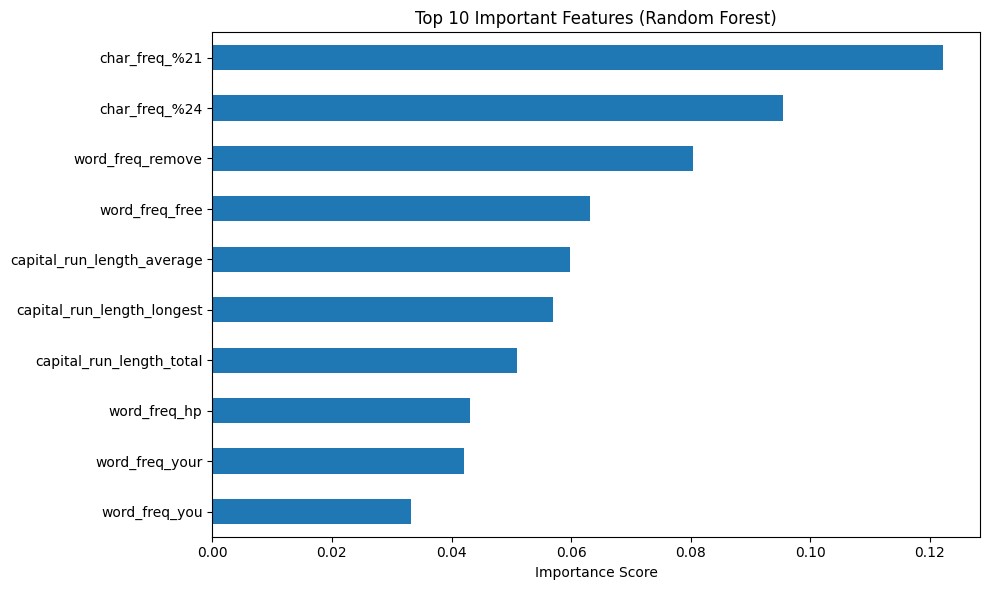

In [4]:
# ========== TOP 10 FEATURES USING RANDOM FOREST ==========

from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on raw data (unscaled, since it's tree-based)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_raw, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_raw.columns)
top_features = importances.sort_values(ascending=False).head(10)

# Print top features
print("\nTop 10 Important Features (by Random Forest):")
print(top_features)

# Plot top features
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
